In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

In [2]:
df = pd.read_csv('AAPL.csv')
dates = list(range(0,int(len(df))))
prices = df['Close']

In [3]:
prices[np.isnan(prices)] = np.median(prices[~np.isnan(prices)])


C:\Users\DURGESH SAHU\AppData\Local\Temp\ipykernel_17860\1398342004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices[np.isnan(prices)] = np.median(prices[~np.isnan(prices)])


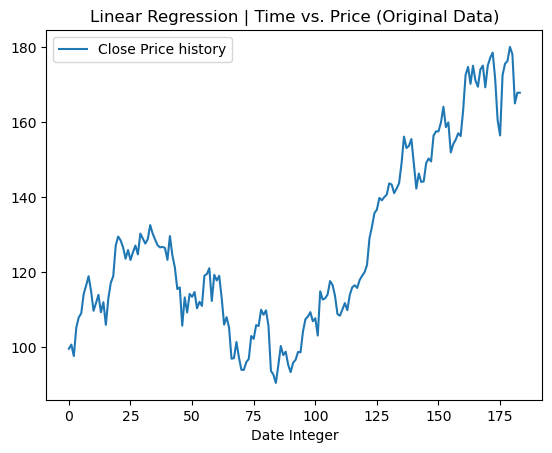

In [4]:
plt.plot(df['Close'], label='Close Price history')
plt.title('Linear Regression | Time vs. Price (Original Data)')
plt.legend()
plt.xlabel('Date Integer')
plt.show()

In [7]:
dates = np.asanyarray(dates)
prices = np.asanyarray(prices)
dates = np.reshape(dates,(len(dates),1))
prices = np.reshape(prices, (len(prices), 1))

In [8]:
try:
  pickle_in = open("prediction.pickle", "rb")
  reg = pickle.load(pickle_in)
  xtrain, xtest, ytrain, ytest = train_test_split(dates, prices, test_size=0.2)
  best = reg.score(ytrain, ytest)
except:
  pass

In [9]:
best = 0
for _ in range(100):
    xtrain, xtest, ytrain, ytest = train_test_split(dates, prices, test_size=0.2)
    reg = LinearRegression().fit(xtrain, ytrain)
    acc = reg.score(xtest, ytest)
    if acc > best:
        best = acc
        #Save model to pickle format
        with open('prediction.pickle','wb') as f:
            pickle.dump(reg, f)
        print(acc)

0.5044119406380196
0.537078180488599
0.612353829506875
0.6219886152988465
0.6369572593186871


In [10]:
pickle_in = open("prediction.pickle", "rb")
reg = pickle.load(pickle_in)

#Get the average accuracy of the model
mean = 0
for i in range(10):
  #Random Split Data
  msk = np.random.rand(len(df)) < 0.8
  xtest = dates[~msk]
  ytest = prices[~msk]
  mean += reg.score(xtest,ytest)


Average Accuracy: 0.44054394812883013


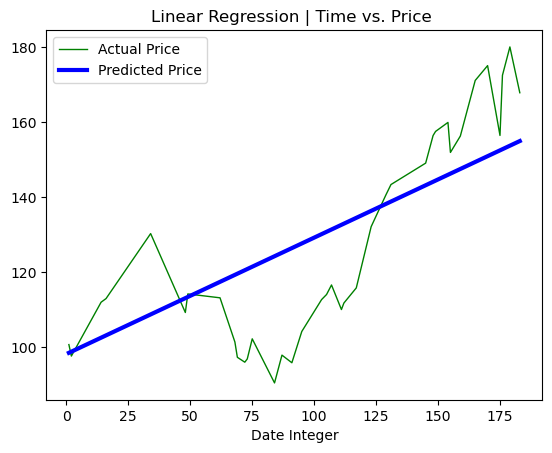

In [11]:
print("Average Accuracy:", mean/10)

#Plot Predicted VS Actual Data
plt.plot(xtest, ytest, color='green',linewidth=1, label= 'Actual Price') #plotting the initial datapoints
plt.plot(xtest, reg.predict(xtest), color='blue', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Linear Regression | Time vs. Price ')
plt.legend()
plt.xlabel('Date Integer')
plt.show()